In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
%pwd

'/home/cdot/Desktop/ML_Folder/Flipkart_category_prediction/flipkart_categories_prediction'

In [4]:
os.chdir('../')

In [5]:
%pwd

'/home/cdot/Desktop/ML_Folder/Flipkart_category_prediction'

In [6]:
os.chdir('/home/cdot/Desktop/datasets')

In [8]:
os.listdir()

['SampleData.csv',
 'kagglecatsanddogs_5340',
 'predict-energy-behavior-of-prosumers',
 'face_recognition_30',
 'images',
 'train_dataset.csv',
 'flipkart_com-ecommerce_sample.csv',
 'kidney-ct-scan-image.zip',
 'sampledataset.csv',
 'Image_Cluster_verification.csv',
 'naticusdroid+android+permissions+dataset',
 'test_dataset.csv']

In [9]:
fk_df = pd.read_csv("flipkart_com-ecommerce_sample.csv")
fk_df.head(2)

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,c2d766ca982eca8304150849735ffef9,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2FF9KEDEFGF,999.0,379.0,"[""http://img5a.flixcart.com/image/short/u/4/a/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
1,7f7036a6d550aaa89d34c77bd39a5e48,2016-03-25 22:59:23 +0000,http://www.flipkart.com/fabhomedecor-fabric-do...,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",SBEEH3QGU7MFYJFY,32157.0,22646.0,"[""http://img6a.flixcart.com/image/sofa-bed/j/f...",False,FabHomeDecor Fabric Double Sofa Bed (Finish Co...,No rating available,No rating available,FabHomeDecor,"{""product_specification""=>[{""key""=>""Installati..."


In [10]:
fk_df.shape

(20000, 15)

In [11]:
fk_df.columns

Index(['uniq_id', 'crawl_timestamp', 'product_url', 'product_name',
       'product_category_tree', 'pid', 'retail_price', 'discounted_price',
       'image', 'is_FK_Advantage_product', 'description', 'product_rating',
       'overall_rating', 'brand', 'product_specifications'],
      dtype='object')

In [12]:
fk_df.tail(2)

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
19998,669e79b8fa5d9ae020841c0c97d5e935,2015-12-01 10:15:43 +0000,http://www.flipkart.com/elite-collection-mediu...,Elite Collection Medium Acrylic Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",STIE8YSVEPPCZ42Y,1499.0,1199.0,"[""http://img5a.flixcart.com/image/sticker/4/2/...",False,Buy Elite Collection Medium Acrylic Sticker fo...,No rating available,No rating available,Elite Collection,"{""product_specification""=>[{""key""=>""Number of ..."
19999,cb4fa87a874f715fff567f7b7b3be79c,2015-12-01 10:15:43 +0000,http://www.flipkart.com/elite-collection-mediu...,Elite Collection Medium Acrylic Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",STIE88KN9ZDSGZKY,1499.0,999.0,"[""http://img6a.flixcart.com/image/sticker/z/k/...",False,Buy Elite Collection Medium Acrylic Sticker fo...,No rating available,No rating available,Elite Collection,"{""product_specification""=>[{""key""=>""Number of ..."


In [13]:
fk_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   uniq_id                  20000 non-null  object 
 1   crawl_timestamp          20000 non-null  object 
 2   product_url              20000 non-null  object 
 3   product_name             20000 non-null  object 
 4   product_category_tree    20000 non-null  object 
 5   pid                      20000 non-null  object 
 6   retail_price             19922 non-null  float64
 7   discounted_price         19922 non-null  float64
 8   image                    19997 non-null  object 
 9   is_FK_Advantage_product  20000 non-null  bool   
 10  description              19998 non-null  object 
 11  product_rating           20000 non-null  object 
 12  overall_rating           20000 non-null  object 
 13  brand                    14136 non-null  object 
 14  product_specifications

In [14]:
fk_df.dtypes

uniq_id                     object
crawl_timestamp             object
product_url                 object
product_name                object
product_category_tree       object
pid                         object
retail_price               float64
discounted_price           float64
image                       object
is_FK_Advantage_product       bool
description                 object
product_rating              object
overall_rating              object
brand                       object
product_specifications      object
dtype: object

In [15]:
fk_df.describe()

,retail_price,discounted_price
count,19922.000000,19922.000000
mean,2979.206104,1973.401767
std,9009.639341,7333.586040
min,35.000000,35.000000
25%,666.000000,350.000000
50%,1040.000000,550.000000
75%,1999.000000,999.000000
max,571230.000000,571230.000000


In [16]:
fk_df.describe(include = "O").T

,count,unique,top,freq
uniq_id,20000,20000,c2d766ca982eca8304150849735ffef9,1
crawl_timestamp,20000,371,2015-12-01 12:40:44 +0000,1979
product_url,20000,20000,http://www.flipkart.com/alisha-solid-women-s-c...,1
product_name,20000,12676,TheLostPuppy Back Cover for Apple iPad Air,134
product_category_tree,20000,6466,"[""Jewellery >> Necklaces & Chains >> Necklaces""]",1567
pid,20000,19998,JEAEGE8Q8GXYFTGU,2
image,19997,18589,"[""http://img6a.flixcart.com/image/car-mat/m/t/...",45
description,19998,17539,TheLostPuppy Back Cover for Apple iPad Air (Mu...,92
product_rating,20000,36,No rating available,18151
overall_rating,20000,36,No rating available,18151


In [17]:
fk_df["crawl_timestamp"] = pd.to_datetime(fk_df["crawl_timestamp"])

In [18]:
fk_df.dtypes

uniq_id                                 object
crawl_timestamp            datetime64[ns, UTC]
product_url                             object
product_name                            object
product_category_tree                   object
pid                                     object
retail_price                           float64
discounted_price                       float64
image                                   object
is_FK_Advantage_product                   bool
description                             object
product_rating                          object
overall_rating                          object
brand                                   object
product_specifications                  object
dtype: object

In [19]:
fk_df["image"]

0        ["http://img5a.flixcart.com/image/short/u/4/a/...
1        ["http://img6a.flixcart.com/image/sofa-bed/j/f...
2        ["http://img5a.flixcart.com/image/shoe/7/z/z/r...
3        ["http://img5a.flixcart.com/image/short/6/2/h/...
4        ["http://img5a.flixcart.com/image/pet-shampoo/...
                               ...                        
19995    ["http://img6a.flixcart.com/image/wall-decorat...
19996    ["http://img6a.flixcart.com/image/sticker/z/g/...
19997    ["http://img5a.flixcart.com/image/sticker/b/s/...
19998    ["http://img5a.flixcart.com/image/sticker/4/2/...
19999    ["http://img6a.flixcart.com/image/sticker/z/k/...
Name: image, Length: 20000, dtype: object

In [37]:

# # importing modules 
# import urllib.request as req
# from PIL import Image 
  
# req.urlretrieve("http://img5a.flixcart.com/image/short/u/4/a/altht-3p-21-alisha-38-original-imaeh2d5vm5zbtgg.jpeg", "sample_img.jpeg") 
  
# img = Image.open("sample_img.jpeg") 
# img.show()

In [20]:
fk_df["product_rating"].value_counts()

product_rating
No rating available    18151
5                        620
4                        246
1                        171
3                        168
2                         80
4.5                       67
3.7                       51
4.2                       47
3.5                       45
4.3                       45
3.6                       25
4.1                       24
4.7                       24
2.5                       23
3.8                       23
4.8                       21
3.2                       20
3.3                       17
4.4                       16
3.9                       15
3.4                       13
2.3                       12
2.8                       11
2.7                       10
4.6                        9
2.2                        8
3.1                        7
2.4                        5
2.9                        5
1.5                        4
4.9                        4
1.3                        4
1.7                        4

In [21]:
fk_df.isnull().sum()

uniq_id                       0
crawl_timestamp               0
product_url                   0
product_name                  0
product_category_tree         0
pid                           0
retail_price                 78
discounted_price             78
image                         3
is_FK_Advantage_product       0
description                   2
product_rating                0
overall_rating                0
brand                      5864
product_specifications       14
dtype: int64

In [22]:
fk_df.head()

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,c2d766ca982eca8304150849735ffef9,2016-03-25 22:59:23+00:00,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2FF9KEDEFGF,999.0,379.0,"[""http://img5a.flixcart.com/image/short/u/4/a/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
1,7f7036a6d550aaa89d34c77bd39a5e48,2016-03-25 22:59:23+00:00,http://www.flipkart.com/fabhomedecor-fabric-do...,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",SBEEH3QGU7MFYJFY,32157.0,22646.0,"[""http://img6a.flixcart.com/image/sofa-bed/j/f...",False,FabHomeDecor Fabric Double Sofa Bed (Finish Co...,No rating available,No rating available,FabHomeDecor,"{""product_specification""=>[{""key""=>""Installati..."
2,f449ec65dcbc041b6ae5e6a32717d01b,2016-03-25 22:59:23+00:00,http://www.flipkart.com/aw-bellies/p/itmeh4grg...,AW Bellies,"[""Footwear >> Women's Footwear >> Ballerinas >...",SHOEH4GRSUBJGZXE,999.0,499.0,"[""http://img5a.flixcart.com/image/shoe/7/z/z/r...",False,Key Features of AW Bellies Sandals Wedges Heel...,No rating available,No rating available,AW,"{""product_specification""=>[{""key""=>""Ideal For""..."
3,0973b37acd0c664e3de26e97e5571454,2016-03-25 22:59:23+00:00,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2F6HUZMQ6SJ,699.0,267.0,"[""http://img5a.flixcart.com/image/short/6/2/h/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
4,bc940ea42ee6bef5ac7cea3fb5cfbee7,2016-03-25 22:59:23+00:00,http://www.flipkart.com/sicons-all-purpose-arn...,Sicons All Purpose Arnica Dog Shampoo,"[""Pet Supplies >> Grooming >> Skin & Coat Care...",PSOEH3ZYDMSYARJ5,220.0,210.0,"[""http://img5a.flixcart.com/image/pet-shampoo/...",False,Specifications of Sicons All Purpose Arnica Do...,No rating available,No rating available,Sicons,"{""product_specification""=>[{""key""=>""Pet Type"",..."


In [23]:
fk_df["crawl_timestamp"].value_counts()

crawl_timestamp
2015-12-01 12:40:44+00:00    1979
2015-12-01 06:13:00+00:00    1959
2016-01-07 06:04:02+00:00    1000
2015-12-12 11:46:53+00:00     950
2015-12-30 00:17:46+00:00     940
                             ... 
2016-05-29 23:15:49+00:00       1
2016-06-12 15:33:31+00:00       1
2016-05-29 14:55:37+00:00       1
2016-06-12 20:17:49+00:00       1
2016-06-04 09:02:49+00:00       1
Name: count, Length: 371, dtype: int64

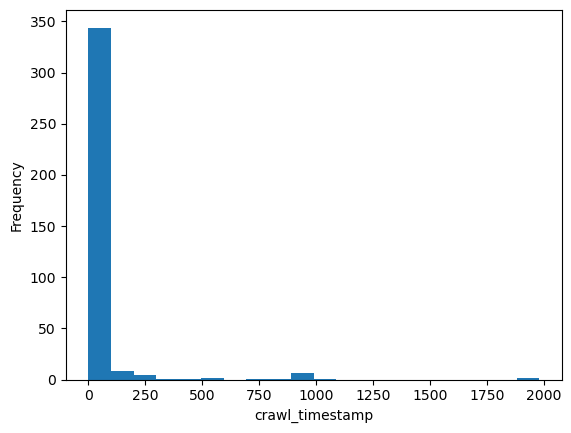

In [52]:
ax = fk_df["crawl_timestamp"].value_counts().plot(kind = "hist", bins = 20, )
ax.set_xlabel("crawl_timestamp")
plt.show()

<AxesSubplot:xlabel='product_category_tree'>

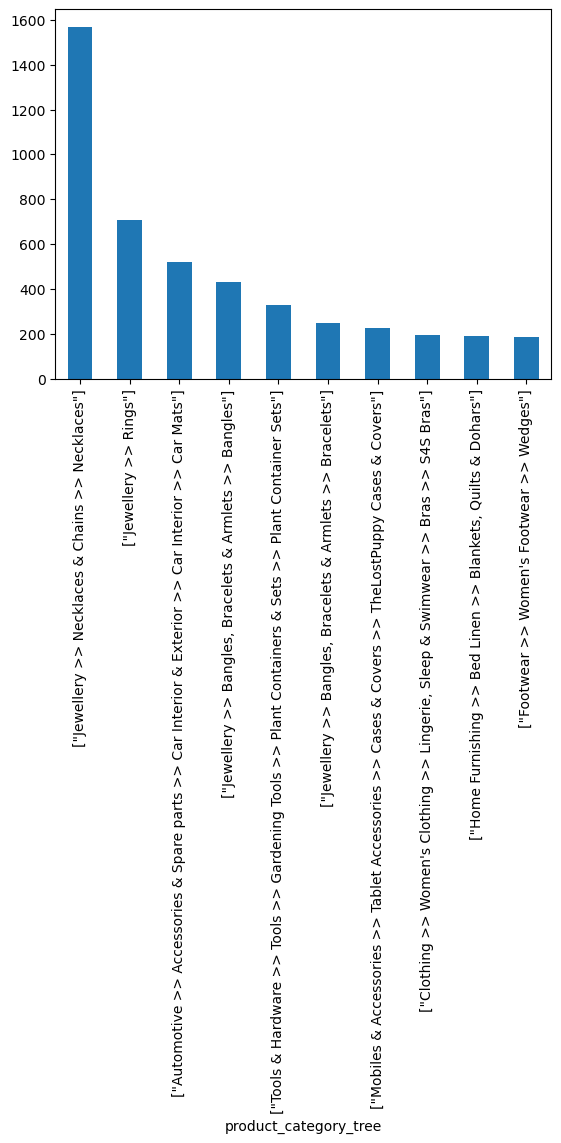

In [56]:
fk_df["product_category_tree"].value_counts()[:10].plot(kind = "bar")

<AxesSubplot:xlabel='is_FK_Advantage_product'>

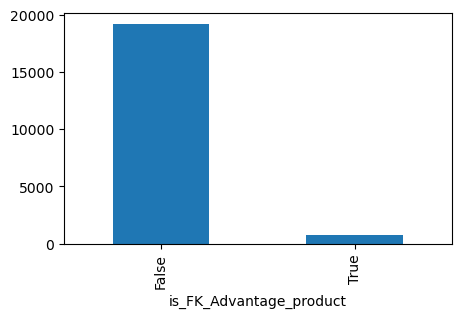

In [64]:
figure = plt.figure(figsize=(5,3))
fk_df["is_FK_Advantage_product"].value_counts().plot(kind = "bar")

In [88]:
fk_df.shape

(20000, 15)

In [87]:
fk_df.head(2)

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,c2d766ca982eca8304150849735ffef9,2016-03-25 22:59:23+00:00,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2FF9KEDEFGF,999.0,379.0,"[""http://img5a.flixcart.com/image/short/u/4/a/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
1,7f7036a6d550aaa89d34c77bd39a5e48,2016-03-25 22:59:23+00:00,http://www.flipkart.com/fabhomedecor-fabric-do...,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",SBEEH3QGU7MFYJFY,32157.0,22646.0,"[""http://img6a.flixcart.com/image/sofa-bed/j/f...",False,FabHomeDecor Fabric Double Sofa Bed (Finish Co...,No rating available,No rating available,FabHomeDecor,"{""product_specification""=>[{""key""=>""Installati..."


In [113]:
sorted(fk_df["retail_price"])[::-1][:10]

[217500.0,
 69999.0,
 49999.0,
 49999.0,
 49999.0,
 49999.0,
 49999.0,
 49930.0,
 49736.0,
 49613.0]

In [161]:
brand_retail_price = pd.DataFrame(fk_df.groupby(["brand"])["retail_price"].sum())
brand_retail_price = brand_retail_price.reset_index(col_level=0)
brand_retail_price.query("brand == 'Alisha'")

,brand,retail_price
163,Alisha,6094.0


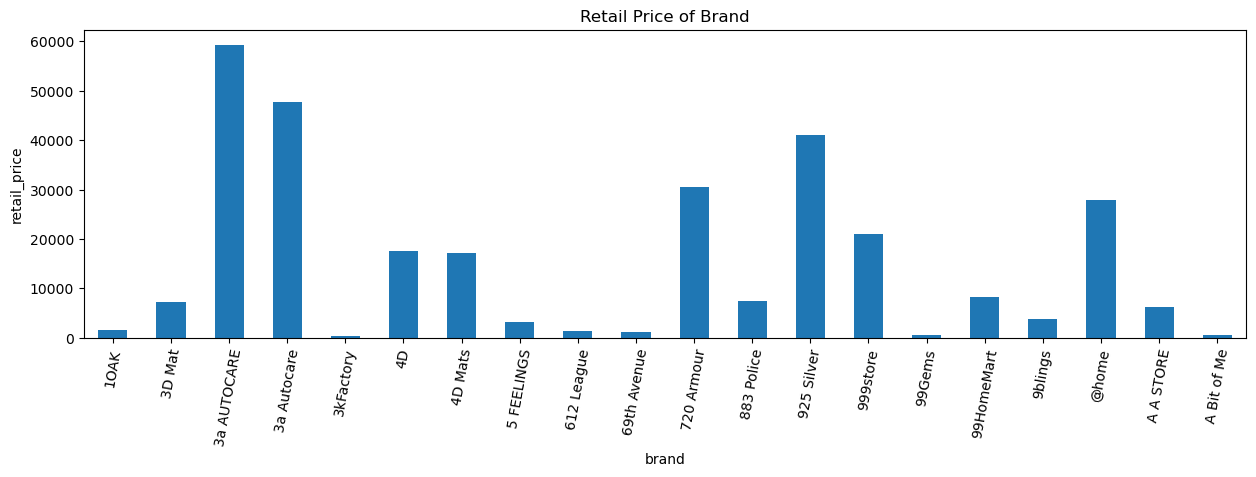

In [163]:
ax = brand_retail_price[:20].plot(kind = "bar", x = "brand", y = 'retail_price', 
                     rot = 80, legend=False,
                     figsize=(15,4))
ax.set_ylabel("retail_price")
ax.set_title("Retail Price of Brand")
plt.show()

In [84]:
fk_df.groupby("brand")["retail_price"].size()

brand
1OAK             2
3D Mat           1
3a AUTOCARE     23
3a Autocare     18
3kFactory        1
                ..
youniqueshop     1
zDelhi.com       1
zaidis           1
zasmina          2
 Tarkan          1
Name: retail_price, Length: 3499, dtype: int64

In [33]:
fk_df["product_specifications"].value_counts()

product_specifications
{"product_specification"=>[{"key"=>"Type", "value"=>"Mug"}, {"key"=>"Mug Capacity", "value"=>"5.5 l"}, {"key"=>"Freezer Safe", "value"=>"Yes"}, {"key"=>"Material", "value"=>"Ceramic"}, {"key"=>"Microwave Safe", "value"=>"Yes"}, {"value"=>"1 Year Rockmantra Brand Warranty and Free Transit Insurance."}, {"key"=>"Diameter", "value"=>"88 mm"}, {"key"=>"Weight", "value"=>"300 g"}, {"key"=>"Height", "value"=>"101 mm"}, {"key"=>"Width", "value"=>"88 mm"}, {"key"=>"Sales Package", "value"=>"1 mug"}]}                                                                                                                                                                   71
{"product_specification"=>nil}                                                                                                                                                                                                                                                                                            